# This analysis report is based on an online questionnaire about the gamer and their mental health between 2015 and 2017 in Africa

## recording links: https://uci.zoom.us/rec/share/jzTTZP7ytbQ_e7G33A_Yapbi-2DMELA5uax3UiEydpPC_0luSVMbUS4GWtlLGSBL.F3t_9BGgm7QAYPZV?startTime=1722319013000


<p>Dataset:
https://data.mendeley.com/datasets/c53rh2h435/4</p>
<p>ISI:
https://www.med.upenn.edu/cbti/assets/user-content/documents/Insomnia%20Severity%20Index%20(ISI).pdf</p>
<p>ESS:
https://www.uofmhealth.org/conditions-treatments/brain-neurological-conditions/epworth-sleepiness-scale</p>
<p>HADS:
https://www.svri.org/sites/default/files/attachments/2016-01-13/HADS.pdf</p>



In [1]:
import pandas as pd
import seaborn as sns

In [2]:
# Load the Excel file
file_path = "Exploratory study of mental health among gamers in Gabon and Tunisia.xlsx"
excel_data = pd.ExcelFile(file_path)

# Print the third sheet (Definitions)
definitions_df = pd.read_excel(file_path, sheet_name="Definitions")
print(definitions_df)

   Participants                                Unnamed: 1
0          Educ                                 education
1           Age                                       Age
2        Mhog/w                 Mean Hours of Gaming/week
3        Mmog/g               Mean months of gaming/gamer
4            Ag                           Addicted gamers
5            Pg                        Problematic gamers
6            Eg                            Engaged gamers
7            Ng                    Non problematic gamers
8         Smart                                Smartphone
9        Tablet                                    Tablet
10       Comput                                  Computer
11       Consol                                   Console
12          Ins                      Insomnia score (ISI)
13          EDS  Excessive Daytime Sleepiness score (ESS)
14          Anx                    Anxiety score (HADS-A)
15          Dep                Depression score (HADS-D) 
16            

In [3]:
# Import the first two sheets into DataFrames
tunisia_df = pd.read_excel(file_path, sheet_name="Tunisia")
gabon_df = pd.read_excel(file_path, sheet_name="Gabon")
#print(tunisia_df.info())
#print(gabon_df.info())

In [4]:
# combine two df together
combined_df = pd.concat([tunisia_df, gabon_df], ignore_index=True)

In [5]:
combined_df

,Participants,Educ,Age,Mhog/w,Mmog/g,Ag,Pg,Eg,Ng,Smart,Tablet,Comput,Consol,Ins,EDS,Anx,Dep
0,h,b,18,20,29,0,0,1,0,1,0,0,0,6,6,8,8
1,h,b,22,9,36,0,0,0,1,1,0,0,0,5,4,4,4
2,h,b,17,21,25,0,0,1,0,1,0,0,0,6,7,4,4
3,h,b,29,23,31,0,1,0,0,1,0,0,0,12,14,10,4
4,h,b,23,18,24,0,0,0,1,1,0,0,0,5,5,4,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,h,b,18,6,20,1,0,0,0,1,0,0,0,21,18,19,17
746,h,b,18,10,15,0,1,0,0,1,0,0,0,14,11,12,10
747,h,b,19,4,11,0,0,1,0,1,0,0,0,10,7,8,6
748,h,b,18,5,21,1,0,0,0,1,0,0,0,20,17,18,16


In [6]:
#modified data
combined_df.loc[:, "is_male"] = combined_df["Participants"].apply(lambda x: 1 if x=="h" else 0)
combined_df = combined_df.drop(["Educ","Participants"], axis = 1)

In [7]:
# check if any irregular data
gamer_columns = ["Ag", "Pg", "Eg", "Ng"]
non_regular_rows =combined_df[combined_df[gamer_columns].sum(axis=1) != 1]
print(non_regular_rows)
print()
device_columns = ["Smart", "Tablet", "Comput", "Consol"]
invalid_rows =combined_df[combined_df[device_columns].sum(axis=1) != 1]
print(invalid_rows)

     Age  Mhog/w  Mmog/g  Ag  Pg  Eg  Ng  Smart  Tablet  Comput  Consol  Ins  \
141   21      22      28   0   1   1   0      0       0       1       0    6   

     EDS  Anx  Dep  is_male  
141    5    8    5        1  

Empty DataFrame
Columns: [Age, Mhog/w, Mmog/g, Ag, Pg, Eg, Ng, Smart, Tablet, Comput, Consol, Ins, EDS, Anx, Dep, is_male]
Index: []


In [8]:
# drop the problem row.
combined_df = combined_df.drop(index=141)

In [9]:
# converting the gamer_type and device_type
combined_df.loc[:, "gamer_type"] = combined_df.apply(lambda row: 3 if row["Ag"]==1 else 
                                                     2 if row["Pg"]==1 else 1 if row["Eg"]==1 else 0, axis = 1)
combined_df.loc[:, "device_type"] = combined_df.apply(lambda row: 4 if row["Consol"]==1 else 
                                                     3 if row["Comput"]==1 else 2 if row["Tablet"]==1 else 1, axis = 1)

In [10]:
# check the score
# 0-28
print(set(combined_df["Ins"]))
# 0-24
print(set(combined_df["EDS"]))
# 0-21
print(set(combined_df["Anx"]))
print(set(combined_df["Dep"]))

{2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23}
{2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22}
{3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21}
{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19}


In [11]:
# Converting score to standard, 0 is normal and higher means more suffer.
combined_df.loc[:, "ISI"] = combined_df.apply(lambda row: 3 if row["Ins"]>=22 else
                                              2 if row["Ins"]>=15 else 1 if row["Ins"]>=8 else 0, axis = 1)
combined_df.loc[:, "ESS"] = combined_df.apply(lambda row: 3 if row["EDS"]>=16 else 
                                              2 if row["EDS"]>=10 else 1 if row["EDS"]>=8 else 0, axis = 1)
combined_df.loc[:, "HADS-A"] = combined_df.apply(lambda row: 2 if row["Anx"]>=11 else
                                                 1 if row["Anx"]>=8 else 0, axis = 1)
combined_df.loc[:, "HADS-D"] = combined_df.apply(lambda row: 2 if row["Dep"]==11 else
                                                 1 if row["Dep"]>=8 else 0, axis = 1)

combined_df

,Age,Mhog/w,Mmog/g,Ag,Pg,Eg,Ng,Smart,Tablet,Comput,...,EDS,Anx,Dep,is_male,gamer_type,device_type,ISI,ESS,HADS-A,HADS-D
0,18,20,29,0,0,1,0,1,0,0,...,6,8,8,1,1,1,0,0,1,1
1,22,9,36,0,0,0,1,1,0,0,...,4,4,4,1,0,1,0,0,0,0
2,17,21,25,0,0,1,0,1,0,0,...,7,4,4,1,1,1,0,0,0,0
3,29,23,31,0,1,0,0,1,0,0,...,14,10,4,1,2,1,1,2,1,0
4,23,18,24,0,0,0,1,1,0,0,...,5,4,6,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,18,6,20,1,0,0,0,1,0,0,...,18,19,17,1,3,1,2,3,2,1
746,18,10,15,0,1,0,0,1,0,0,...,11,12,10,1,2,1,1,2,2,1
747,19,4,11,0,0,1,0,1,0,0,...,7,8,6,1,1,1,1,0,1,0
748,18,5,21,1,0,0,0,1,0,0,...,17,18,16,1,3,1,2,3,2,1


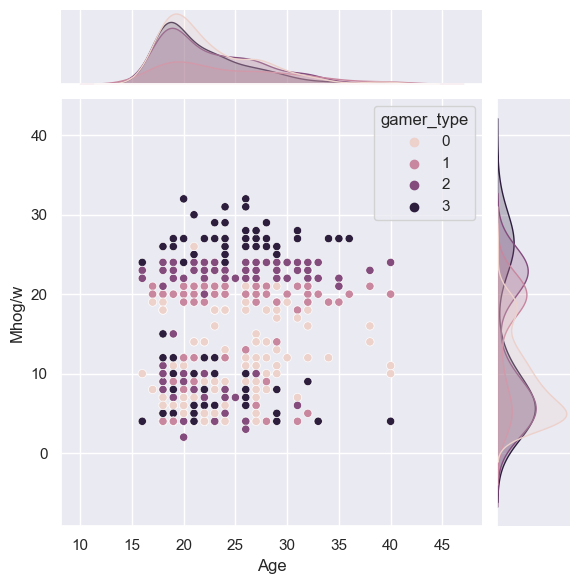

In [12]:
# check the gamer age and their playing time
sns.set_theme()
sns.jointplot(
    data=combined_df,
    x="Age",
    y="Mhog/w",
    hue="gamer_type",
)
# no difference between each age

##  Finding 1: Each type of illness is more depending on the gamer_type instead of playing time

E:\Program Files\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


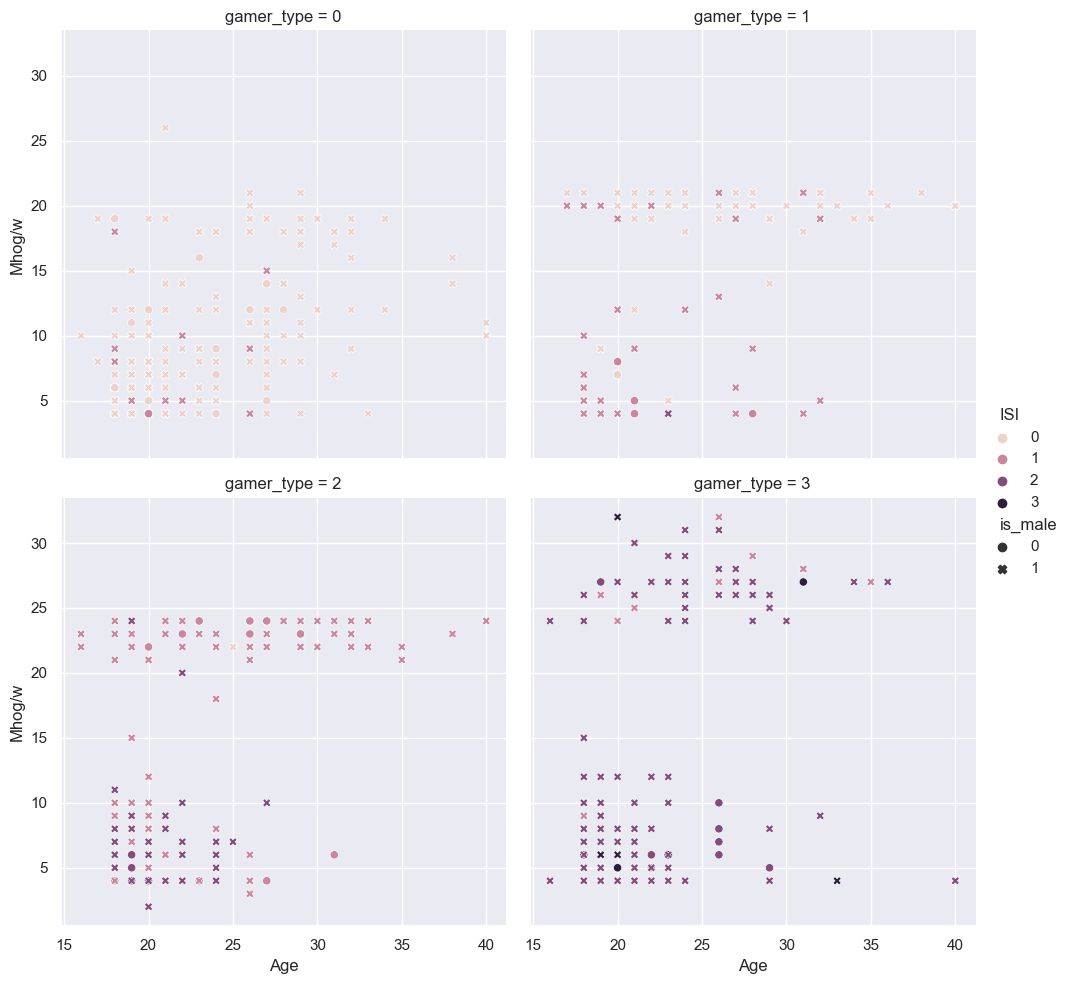

In [13]:
sns.relplot(
    data=combined_df,
    x="Age",
    y="Mhog/w",
    col="gamer_type",
    hue="ISI",
    style="is_male",
    col_wrap=2
)

E:\Program Files\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


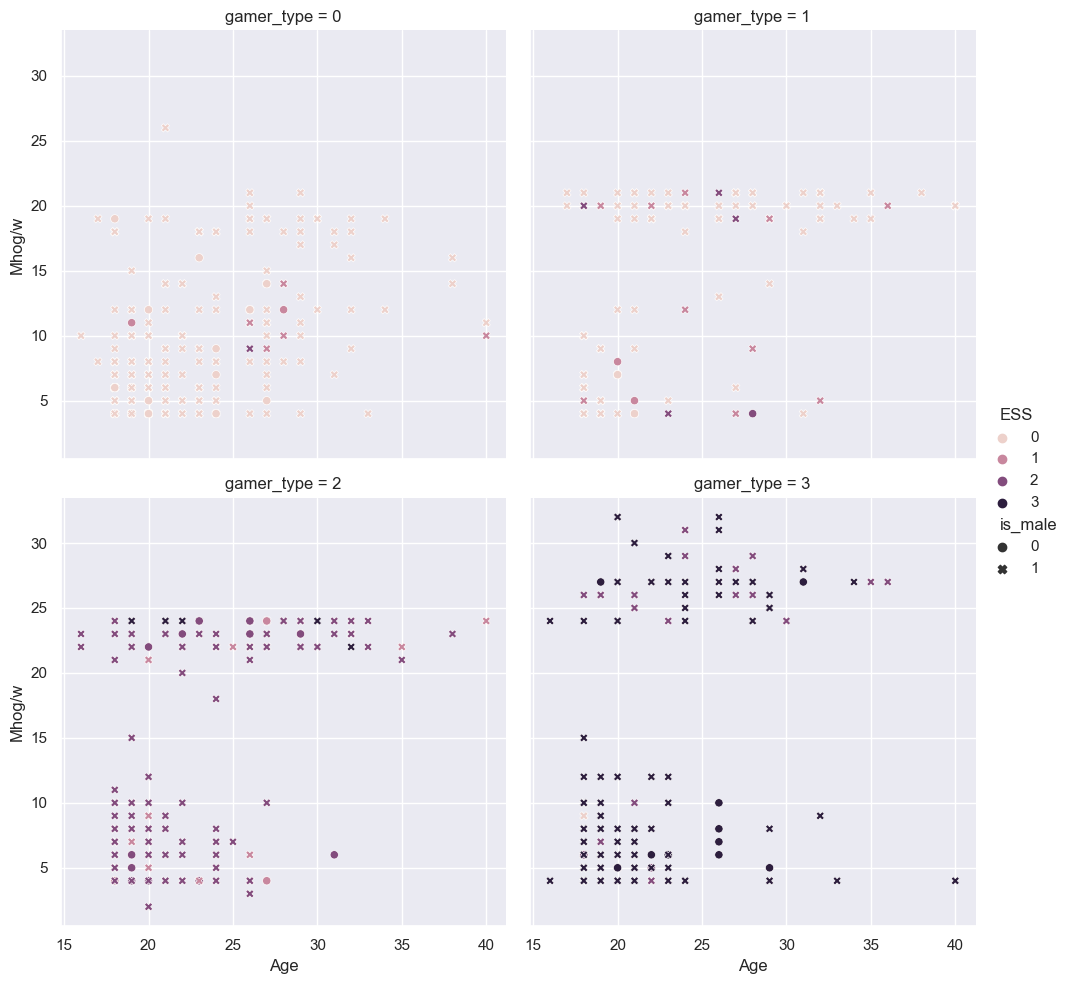

In [14]:
sns.relplot(
    data=combined_df,
    x="Age",
    y="Mhog/w",
    col="gamer_type",
    hue="ESS",
    style="is_male",
    col_wrap=2
)

E:\Program Files\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


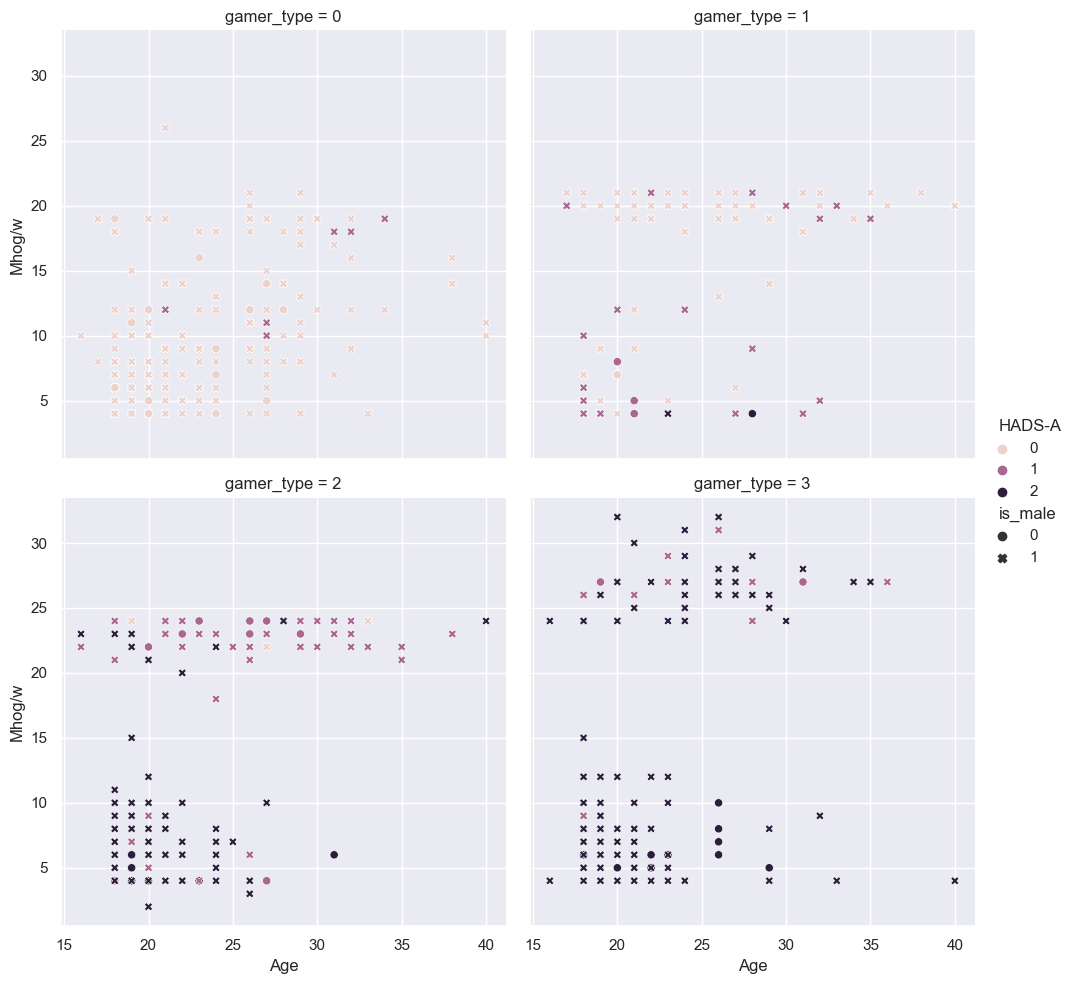

In [15]:
sns.relplot(
    data=combined_df,
    x="Age",
    y="Mhog/w",
    col="gamer_type",
    hue="HADS-A",
    style="is_male",
    col_wrap=2
)

E:\Program Files\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


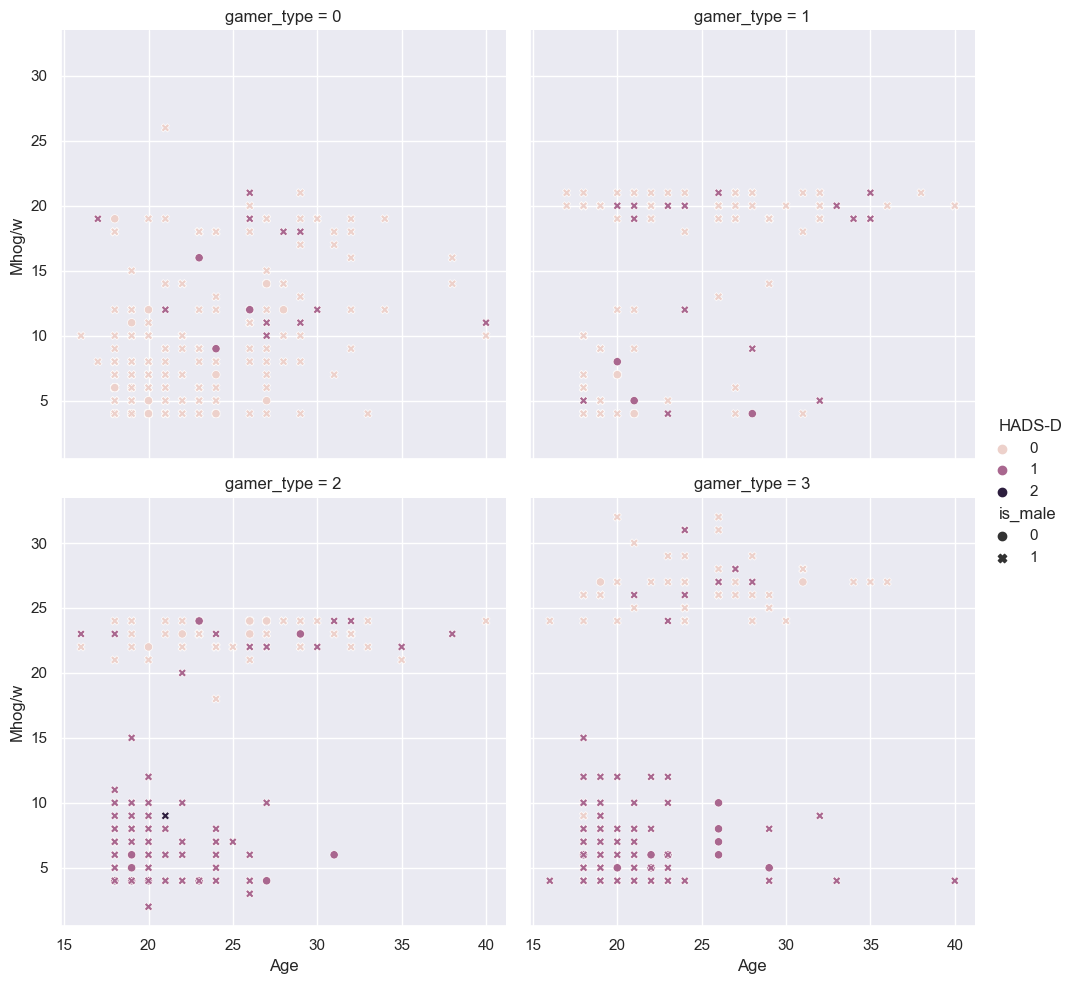

In [16]:
sns.relplot(
    data=combined_df,
    x="Age",
    y="Mhog/w",
    col="gamer_type",
    hue="HADS-D",
    style="is_male",
    col_wrap=2
)

##  Finding 2: People should control themselves playing games no more than 23 hours/week

## Finding 3: the younger player are more affected by these mental problem

E:\Program Files\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
E:\Program Files\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


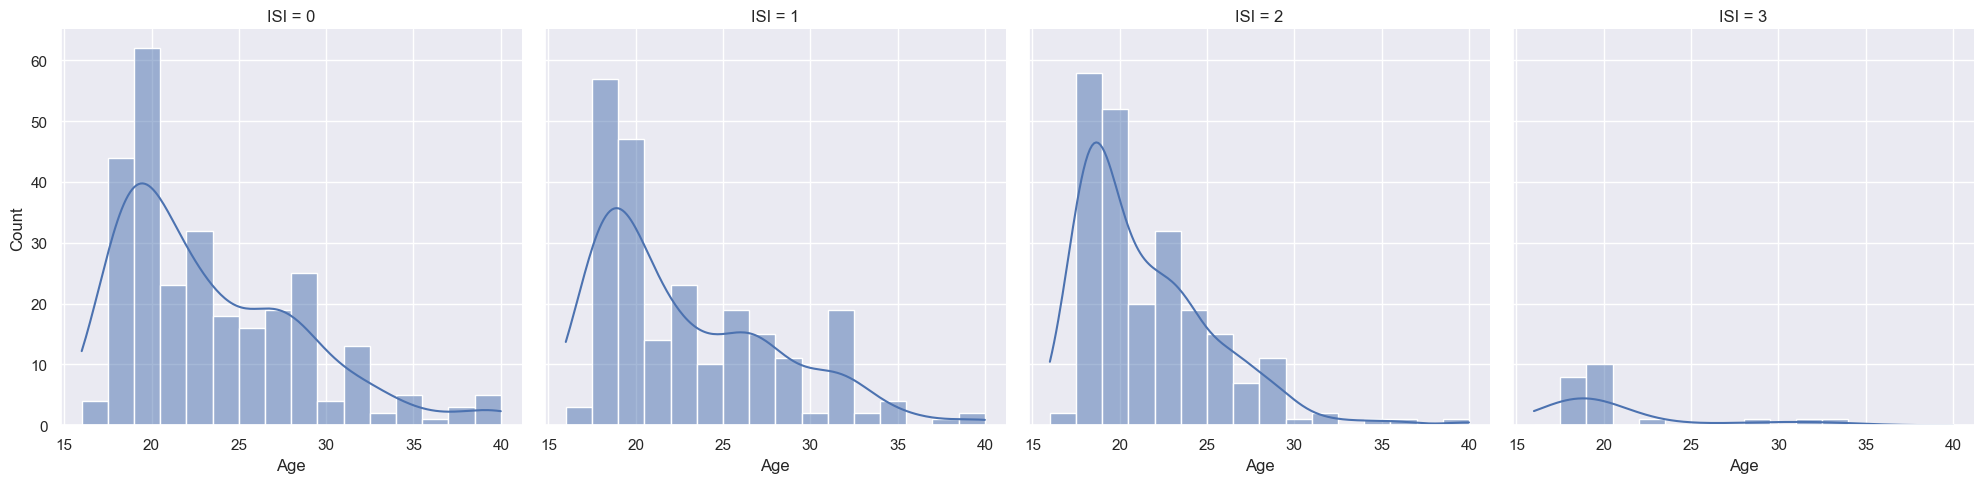

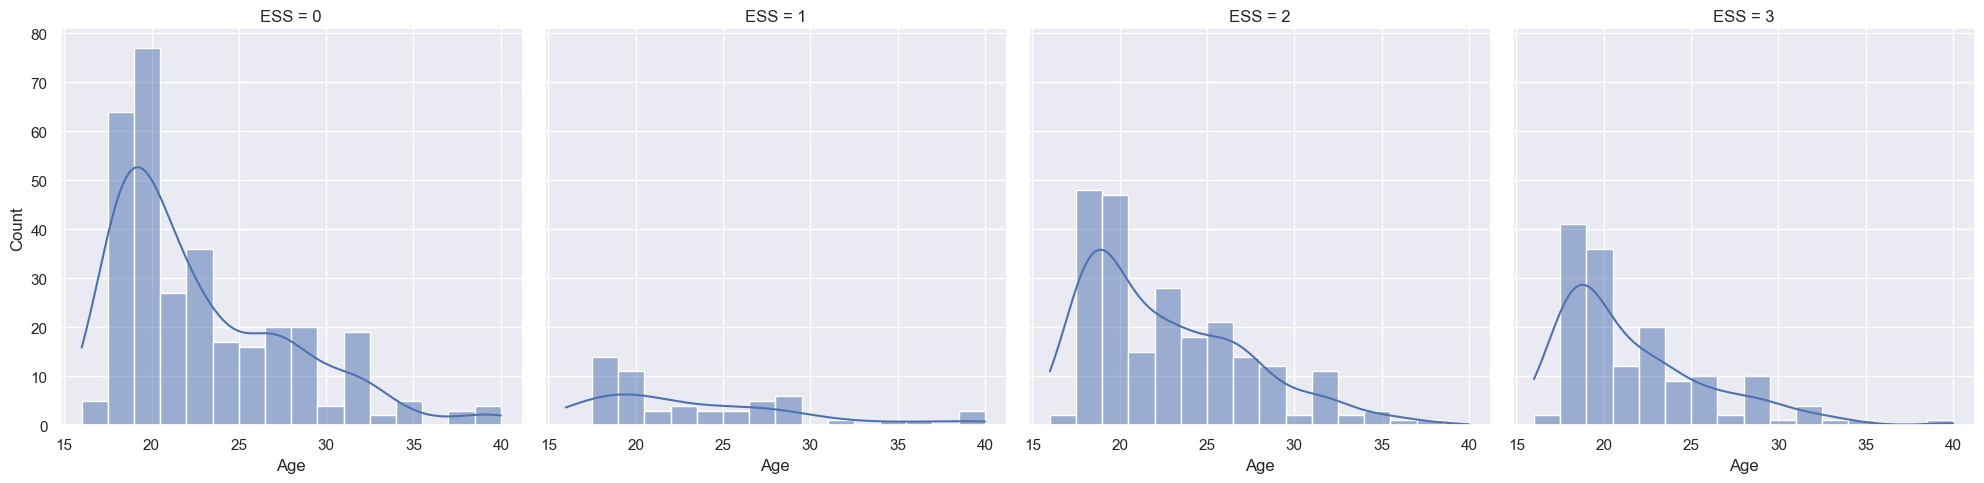

In [17]:
sns.displot(
    data=combined_df,
    x="Age",
    col="ISI",
    kde=True
  )
sns.displot(
    data=combined_df,
    x="Age",
    col="ESS",
    kde=True
  )

E:\Program Files\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
E:\Program Files\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


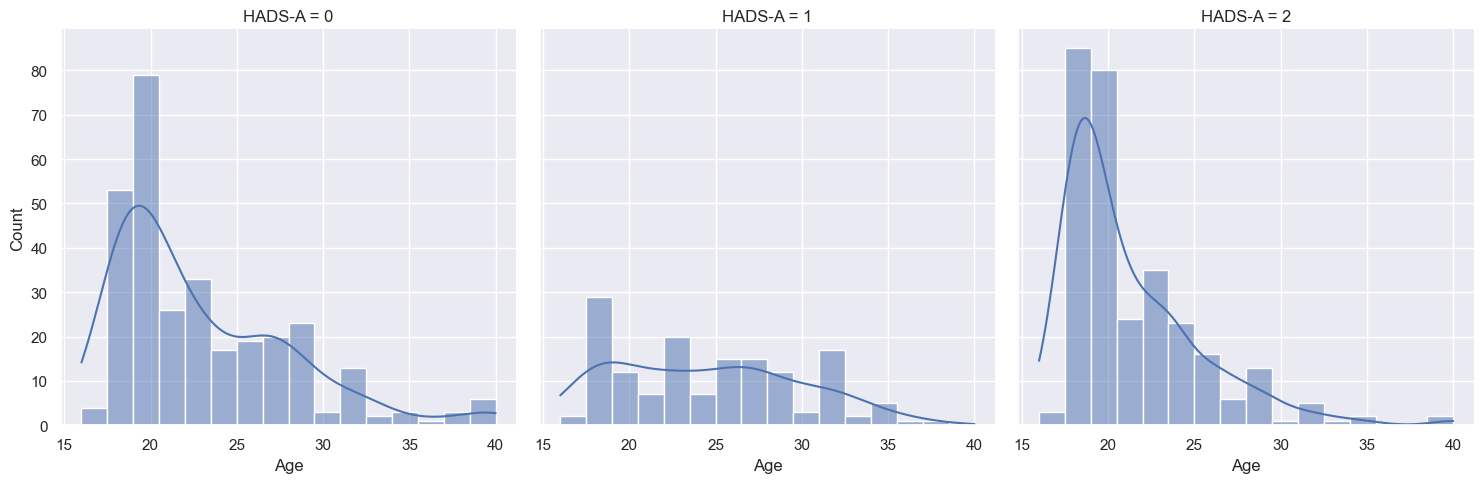

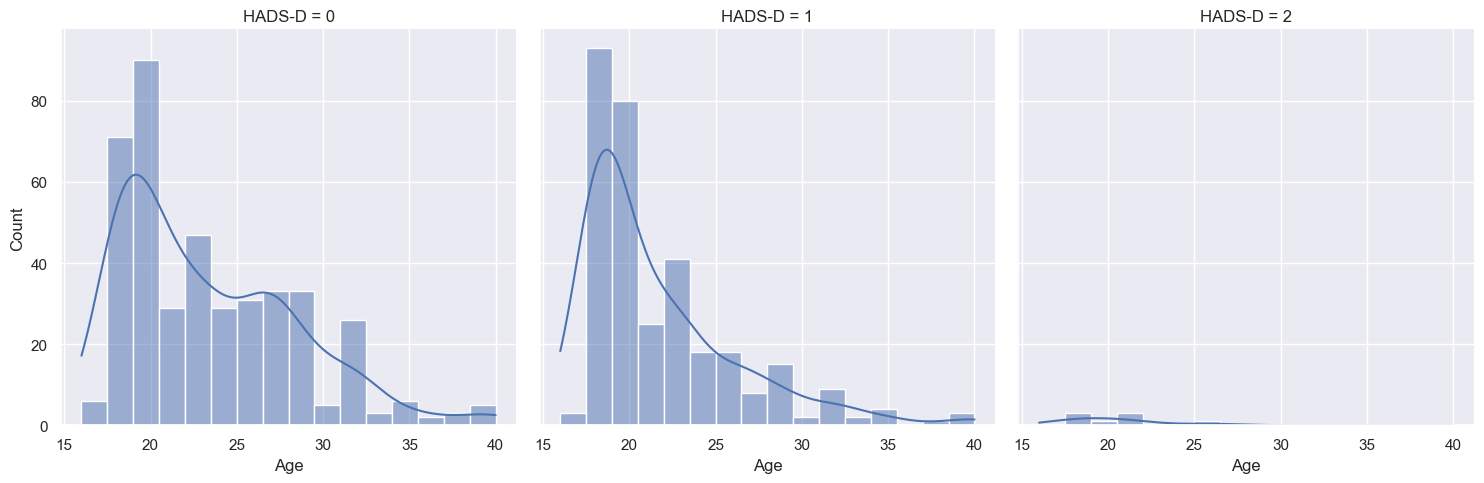

In [18]:
sns.displot(
    data=combined_df,
    x="Age",
    col="HADS-A",
    kde=True
  )
sns.displot(
    data=combined_df,
    x="Age",
    col="HADS-D",
    kde=True
  )

# Future works:
### adding the exact data (percentage) and display to adjust the content
### related-data still need: gaming time/sleeping time in Worldwide/US